# Fish Dataset 

<img src="https://cdn.wallpapersafari.com/2/44/g6JNxM.jpg" style="height:250px; border-radius:20px">

Analyzing, predicting the fish weight using Linear Regression and the classifying the species of Fish using the Logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [2]:
df = pd.read_csv("fish_specices.csv")
df.sample(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
67,Parkki,170.0,19.0,20.7,23.2,9.3960,3.4104
12,Bream,500.0,29.1,31.5,36.4,13.7592,4.3680
27,Bream,714.0,32.7,36.0,41.5,16.5170,5.8515


## Understanding the Data

    Weight - weight of fish in gram
    Lenght1 - vetical length in cm
    Lenght2 - diagonal length in cm
    Lenght3 - cross length in cm
    Height - height in cm
    Width - diagonal width in cam

## Data cleaning

In [46]:
df = df.rename(columns={'Length1':'vertical_len', 'Length2':'diagonal_len', 'Length3':'cross_len'}) #renaming
df.sample(5)

,Species,Weight,vertical_len,diagonal_len,cross_len,Height,Width
47,Roach,160.0,21.1,22.5,25.0,6.4000,3.8000
119,Perch,850.0,36.9,40.0,42.3,11.9286,7.1064
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
55,Whitefish,270.0,23.6,26.0,28.7,8.3804,4.2476
12,Bream,500.0,29.1,31.5,36.4,13.7592,4.3680


In [47]:
df.isna().sum() #cheacking for nan values

Species         0
Weight          0
vertical_len    0
diagonal_len    0
cross_len       0
Height          0
Width           0
dtype: int64

## Data Exploration and Visualization

In [5]:
df.describe()

,Weight,vertical_len,diagonal_len,cross_len,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

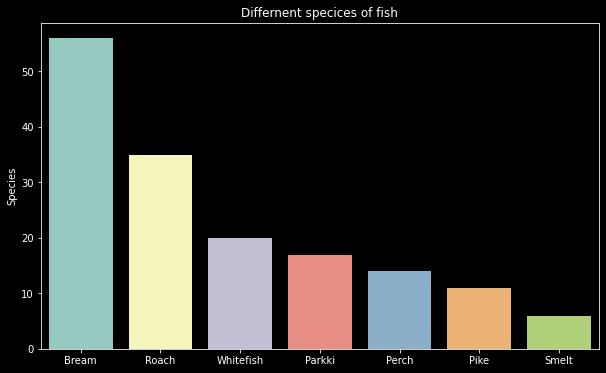

In [48]:
import seaborn as sns
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x=df["Species"].unique(), y=df["Species"].value_counts())
plt.title("Differnent specices of fish")
plt.show()

In [8]:
df.corr()

,Weight,vertical_len,diagonal_len,cross_len,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
vertical_len,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
diagonal_len,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
cross_len,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


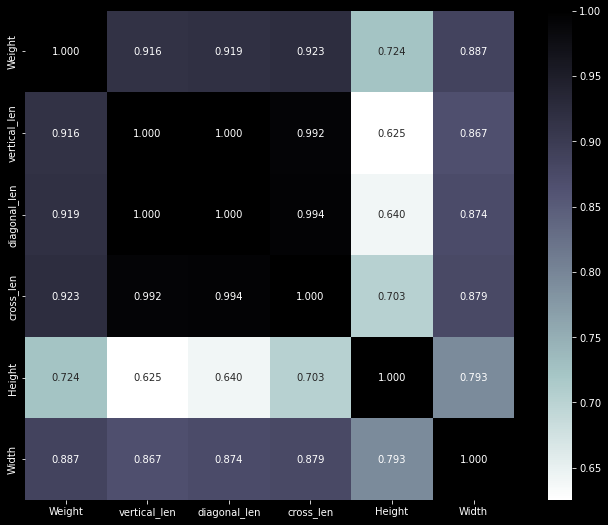

In [9]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot = True, cmap=plt.cm.bone_r, fmt='.3f', square=True)
plt.show()

## Data Cleaning

Remove the features thats are highly correlated btw each other in independent variables like *['Weight', 'vertical_len', 'diagonal_len', 'cross_len']*

In [10]:
df_copy = df.copy()
df_copy = df_copy.drop(['vertical_len', 'diagonal_len', 'cross_len'], axis=1)
df_copy.sample(5)

,Species,Weight,Height,Width
153,Smelt,9.8,2.2044,1.1484
15,Bream,600.0,15.4380,5.5800
36,Roach,69.0,5.2983,2.8217
43,Roach,150.0,5.8045,3.7544
125,Perch,1100.0,12.5125,7.4165


## Using Lineear Regression for predicting the fish weight

In [11]:
df1 = df_copy.drop('Species', axis=1)
df1.sample(5)

,Weight,Height,Width
59,800.0,11.7612,6.5736
82,110.0,5.6925,3.5550
64,120.0,8.3922,2.9181
6,500.0,14.1795,5.2785
45,160.0,7.0334,3.8203


*Train test split*

In [12]:
X, y = df1.drop('Weight', axis=1), df1['Weight'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

*Model*

In [14]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [15]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [16]:
LR_model.score(X_test, y_test)

0.8420412366115981

## Classification of the diffirent species of fishes using the Logistic Regression

In [17]:
X1, y1 = df.drop('Species', axis=1), df['Species']

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

Prepocessing - *Feature scaling*

In [19]:
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
X1.sample(5)

,Weight,vertical_len,diagonal_len,cross_len,Height,Width
28,1.265721,0.657587,0.709967,0.896254,1.853299,1.059756
96,-0.485711,-0.426211,-0.413358,-0.494834,-0.392724,-0.413263
37,-0.897648,-0.877793,-0.900132,-0.866366,-0.794670,-0.900381
152,-1.088484,-1.499973,-1.555404,-1.566230,-1.581455,-1.934898
141,2.386638,2.584340,2.582175,2.460148,0.401457,1.527773


Prepocessing - *Encoding*

In [20]:
y1 = df['Species']

In [21]:
encoder = LabelEncoder()
y1 = encoder.fit_transform(y1)

In [22]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [23]:
y_mappings = {index: label for index, label in enumerate(encoder.classes_)}
y_mappings

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

*Train test split*

In [24]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42, train_size=0.7)

*Model*

In [25]:
from sklearn.linear_model import LogisticRegression
LogR_model = LogisticRegression()

In [26]:
LogR_model.fit(X1_train, y1_train)

LogisticRegression()

In [27]:
LogR_model.score(X1_test, y1_test)

0.8541666666666666

In [28]:
from sklearn.metrics import confusion_matrix
y1_pred = LogR_model.predict(X1_test)
cm = confusion_matrix(y1_test, y1_pred) # actual values vs the predicted values

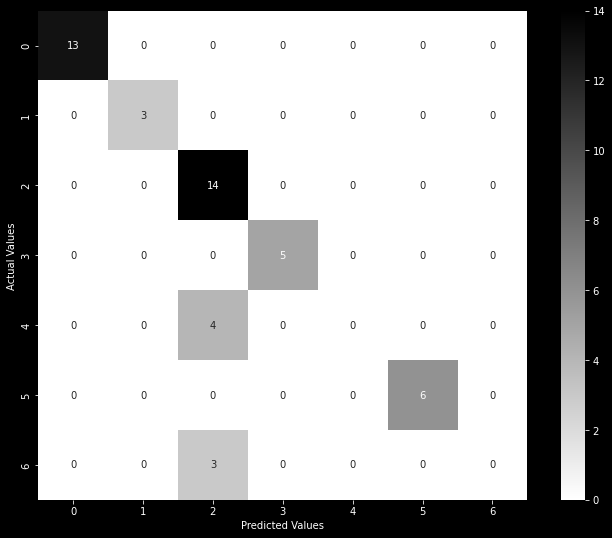

In [45]:
plt.figure(figsize=(12,9))
sns.heatmap(cm, annot = True, cmap=plt.cm.binary, square=True)

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()